In [261]:
import pandas as pd 
import numpy as np 
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split 
import seaborn as sns 

# Reading & Merging Data

In [192]:
#this function is to read, transform and join 2 data frame

def read_features():
    path = 'secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature_'+str(x+1) for x in range(len(df.columns))]
    return df



def read_target():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#for the testing purporse, trim to remain first 100 rows only
X = read_features()
y = read_target().iloc[:,0]

In [193]:
#Row & Columns of Features 
X.shape

(1567, 590)

# Split Training & Test Data 

In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)

In [195]:
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
443,3079.77,2354.51,2207.0444,1269.6078,1.7571,100.0,97.0189,0.1221,1.4607,0.0155,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.2161,1.2753,100.0,105.0478,0.1227,1.4206,-0.0052,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.6732,1.0304,100.0,110.5422,0.1245,1.4964,0.0204,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.0797,1.5611,100.0,99.8300,0.1199,1.4428,-0.0110,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.7771,0.9618,100.0,100.1789,0.1218,1.4950,-0.0097,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4830,-0.0328,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4440,-0.0079,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.2208,1.5552,100.0,95.4256,0.1234,1.4281,0.0049,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3687,-0.0070,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


In [196]:
#Rows and Columns of X_Train DF
x_train.shape

(1253, 590)

# Reducing Dimensionality

## Remove Duplicated Columns

In [197]:
#find the duplicated features (columns)
def remove_duplicated_columns(df):
    dict_duplicate_pair = {}
    dict_duplicate_matches = {}
    list_duplicate = []
    to_remove = []
    for i in range(0, len(df.columns)):
        l = []
        for j in range(i+1,len(df.columns)):
            dict_duplicate_pair[str(i+1)+';'+str(j+1)] = df.iloc[:,i].equals(df.iloc[:,j])
            if df.iloc[:,i].equals(df.iloc[:,j]) == True:
                if j not in list_duplicate:
                    l.append(j)
                    to_remove.append('feature_'+str(j+1))
                list_duplicate.append(i)
                list_duplicate.append(j)
        if len(l)!=0:
            dict_duplicate_matches[i] = l


    df_duplicate_pair = pd.DataFrame.from_dict(dict_duplicate_pair, orient='index')
    df_duplicate_pair.columns=['duplicate']

    df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')

    
    df = df.drop(columns=to_remove, axis = 1)

    return df

In [198]:
x_train = remove_duplicated_columns(x_train)
x_train.shape

(1253, 486)

## Remove Features with high % of Missing Values

In [199]:
def remove_cols_with_high_pct_null(df, null_threshold):
    list_column_with_pct_null = pd.concat([df.isnull().sum(), df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    list_column_with_pct_null= list_column_with_pct_null[list_column_with_pct_null["Percentage (%)"] >= null_threshold]
    df = df.drop(axis=1, columns=list_column_with_pct_null.index)
    return df

x_train = remove_cols_with_high_pct_null(x_train, 0.8)
x_train.shape

(1253, 478)

## Removing Features with Constant Volatility 

In [209]:
def remove_constant_volatility(df):
    df_EDA= df.describe().T
    df_EDA= df_EDA[df_EDA["std"] == 0]
    df = df.drop(axis=1, columns=df_EDA.index)
    return df

x_train = remove_constant_volatility(x_train)
x_train.shape

(1253, 466)

# Outlier Treatment

## Detect Outliers

In [388]:
dict_outliers = {}
for col in x_train.columns:
    ll_col = x_train[col].mean() - 3 * x_train[col].std()
    ul_col = x_train[col].mean() + 3 * x_train[col].std()
    dict_outliers[col] = ((x_train[col] < ll_col) | (x_train[col] > ul_col)).sum()


In [389]:
dict_outliers_perc = {}
for col in x_train.columns:
    ll_col = x_train[col].mean() - 3 * x_train[col].std()
    ul_col = x_train[col].mean() + 3 * x_train[col].std()
    dict_outliers_perc[col] = ((x_train[col] < ll_col) | (x_train[col] > ul_col)).sum()/len(x_train)

In [390]:
df_outliers = pd.DataFrame.from_dict(dict_outliers, orient='index').rename(columns={0:'Number of Outliers'})
df_outliers_perc = pd.DataFrame.from_dict(dict_outliers_perc, orient='index').rename(columns={0:'% Outliers per Column'})
df_outlier3s = pd.concat([df_outliers,df_outliers_perc], axis =1 )
df_outlier3s

,Number of Outliers,% Outliers per Column
feature_1,13,0.010375
feature_2,19,0.015164
feature_3,11,0.008779
feature_4,23,0.018356
feature_5,3,0.002394
...,...,...
feature_586,2,0.001596
feature_587,9,0.007183
feature_588,17,0.013567
feature_589,18,0.014366


In [ ]:
df_outlier3s['% Outliers per Column'] = df_outlier3s['% Outliers per Column'].astype('float')

In [391]:
df_outlier3s.sort_values('Number of Outliers', ascending=False)

,Number of Outliers,% Outliers per Column
feature_39,60,0.047885
feature_577,57,0.045491
feature_575,55,0.043895
feature_578,50,0.039904
feature_573,50,0.039904
...,...,...
feature_501,0,0.000000
feature_512,0,0.000000
feature_540,0,0.000000
feature_541,0,0.000000


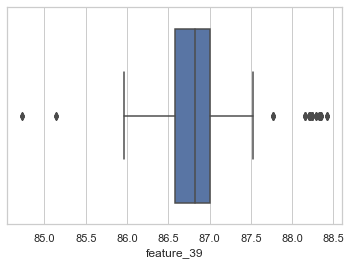

In [442]:
sns.boxplot(x=x_train.feature_39)
plt.show()

In [425]:
#Number of Features without Outliers
len(df_outlier3s.loc[(df_outlier3s['Number of Outliers'] > 0)])

434

In [393]:
#Number of Features with Outliers
len(df_outlier3s.loc[(df_outlier3s['Number of Outliers'] > 0)])

434

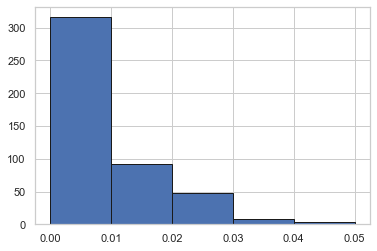

In [399]:
#Histogram
bins = [0,0.01, 0.02, 0.03, 0.04, 0.05]
plt.hist(df_outlier3s['% Outliers per Column'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()

In [400]:
#Preparation of Bar Chart without Features with no Outliers: We first create a new dataframe including features with outliers only
df_bar_outlier = df_outlier3s.loc[(df_outlier3s['Number of Outliers'] > 0)]
df_bar_outlier

,Number of Outliers,% Outliers per Column
feature_1,13,0.010375
feature_2,19,0.015164
feature_3,11,0.008779
feature_4,23,0.018356
feature_5,3,0.002394
...,...,...
feature_586,2,0.001596
feature_587,9,0.007183
feature_588,17,0.013567
feature_589,18,0.014366


In [437]:
#New Column as Bin categories is created within the new Dataframe 
bins = [0.0001, 0.01, 0.02, 0.03, 0.04, 0.05]
labels = [ 'upto 1%', '1 to 2%', '2 to 3%', '3 to 4%', '4 to 5%']
df_bar_outlier['Outlier Category'] = pd.cut(df_bar_outlier['% Outliers per Column'], bins, labels=labels)
df_bar_outlier

/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_76101/678418214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_outlier['Outlier Category'] = pd.cut(df_bar_outlier['% Outliers per Column'], bins, labels=labels)


,Number of Outliers,% Outliers per Column,Outlier Category
feature_1,13,0.010375,1 to 2%
feature_2,19,0.015164,1 to 2%
feature_3,11,0.008779,upto 1%
feature_4,23,0.018356,1 to 2%
feature_5,3,0.002394,upto 1%
...,...,...,...
feature_586,2,0.001596,upto 1%
feature_587,9,0.007183,upto 1%
feature_588,17,0.013567,1 to 2%
feature_589,18,0.014366,1 to 2%


<AxesSubplot:title={'center':'Frequency of Features with certain Percentage of Outliers'}>

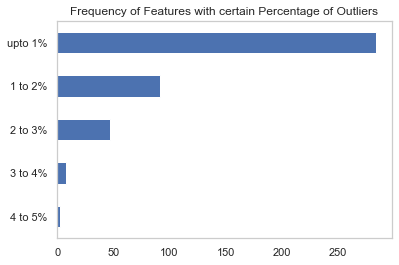

In [441]:
#Simple Bar Chart 
df_bar_outlier['Outlier Category'].value_counts(ascending=True).plot(kind='barh', title='Frequency of Features with certain Percentage of Outliers', grid=False)


In [439]:
#Frequency Counts 
df_bar_outlier['Outlier Category'].value_counts(ascending=False)

upto 1%    284
1 to 2%     92
2 to 3%     47
3 to 4%      8
4 to 5%      3
Name: Outlier Category, dtype: int64